In [11]:
import sys
sys.path.append('../pestools')
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from identpar import IdentPar
from res import *

% matplotlib inline
scipy.__version__

'0.14.0'

In [2]:
mpl.rcParams['font.family'] = 'Arial'

In [3]:
res = Res('../cc/columbia_svda.rei.16', obs_info_file='../cc/observation_locations.csv')

In [4]:
res.df.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual
7089222501_b,7089222501_b,head_best,858.13,850.1707,7.959346,0.2,1.591869,7.959346,1.591869,2.534048
1089192101_b,1089192101_b,head_best,893.24,891.5156,1.724436,0.2,0.344887,1.724436,0.344887,0.118947
2089103101_b,2089103101_b,head_best,924.60,909.9240,14.675990,0.2,2.935198,14.675990,2.935198,8.615387
3089103201_b,3089103201_b,head_best,911.44,910.1028,1.337156,0.2,0.267431,1.337156,0.267431,0.071519
2089475301_b,2089475301_b,head_best,729.25,733.7051,-4.455139,0.2,-0.891028,4.455139,0.891028,0.793931


In [5]:
res.obsinfo.head()

,X,Y,Type,Group
7089222501_b,570954.8275,296365.6586,head,head_best
1089192101_b,575025.8740,304202.1060,head,head_best
2089103101_b,586985.0743,304340.3521,head,head_best
3089103201_b,586962.2041,304370.9770,head,head_best
2089475301_b,536391.8551,305263.7315,head,head_best


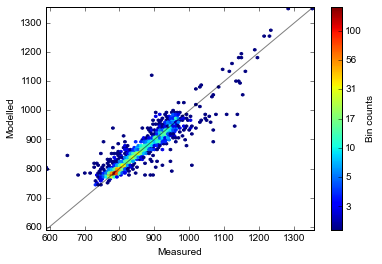

In [6]:
fig, ax = res.plot_hexbin(['WCRs1'])

In [7]:
fig.savefig('hexbin.pdf')

//anaconda/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


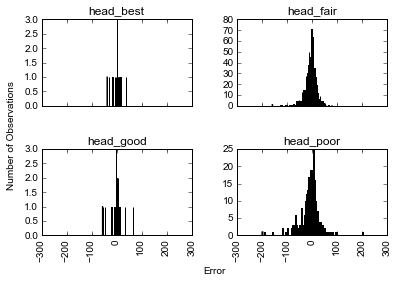

In [8]:
fig, axes = res.plot_hist(groupinfo=['head_best', 'head_good', 'head_fair', 'head_poor'], color='k')

In [9]:
fig.savefig('hist.pdf')

###Identifiability
* Indentifiability is computed using Jeremy's errvar class in pyemu
* ancillary information on parameters (such as location, zones, values, etc.) can be read in using the par_info_file argument


In [23]:
ip = IdentPar('../cc/columbia.jco', par_info_file='../cc/parinfo.csv')

2015-04-06 09:58:49.378923 starting: pre-loading base components
2015-04-06 09:58:49.379014 starting: loading jco: ../cc/columbia.jco
2015-04-06 09:58:49.428906 finished: loading jco: ../cc/columbia.jco took: 0:00:00.049892
2015-04-06 09:58:49.428966 starting: loading pst: ../cc/columbia.pst
2015-04-06 09:58:49.460043 finished: loading pst: ../cc/columbia.pst took: 0:00:00.031077
2015-04-06 09:58:49.460088 starting: loading parcov
2015-04-06 09:58:49.546160 finished: loading parcov took: 0:00:00.086072
2015-04-06 09:58:49.546524 starting: loading obscov
2015-04-06 09:58:49.905787 finished: loading obscov took: 0:00:00.359263
2015-04-06 09:58:49.906165 finished: pre-loading base components took: 0:00:00.527242


###Stacked bar chart

2015-04-06 09:58:49.929016 starting: qhalf
2015-04-06 09:58:49.940586 finished: qhalf took: 0:00:00.011570


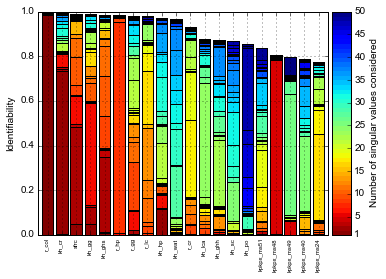

In [24]:
fig, ax = ip.plot_bar(nsingular=50)

In [25]:
fig.savefig('identbar.pdf')

###Pilot Point coordinates brought in from the par_info_file

In [26]:
ip.parinfo.head()

,X,Y,zone,initialK
Name,,,,
kpkpx_tc3,1985516.722,1203426.934,15,5.720760
kpkpx_tc4,2012516.722,1203426.934,15,3.541445
kpkpx_tc7,1958516.722,1176426.934,15,5.942886
kpkpx_tc8,1985516.722,1176426.934,15,2.298416
kpkpx_tc9,2012516.722,1176426.934,15,3.905260


###Spatial plot of total pilot point identifiabilities for a given zone
Support of shapefile overlays coming soon!  
(sorry, I failed to get this figured out for the paper)

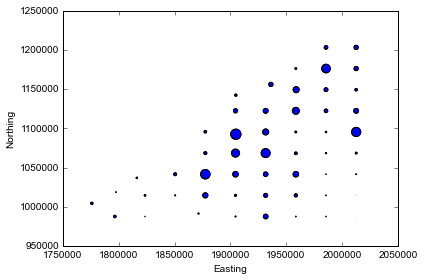

In [27]:
tc = ip.ident_points.ix[ip.ident_points.zone == 15]
fig, ax = ip.plot_spatial(tc, nsingular=50)

In [28]:
fig.savefig('ident_map.pdf')